### Comments
***This problem can be solved using sliding window approach***

The key conditions are as follows:

* Keep expanding the window as you encounter 1s.
* When you meet the first zero ignore and dont add to the count.
* When you meet your second zero boost the start position of the window to first zero index +1.


Started with this solution.
```
class Solution:
    def longestSubarray(self, nums: list[int]) -> int:
        left = 0
        ans = 0

        zero_found = []
        for right in range(len(nums)):
            if nums[right] == 1:
                ans = max(right - left + 1 - len(zero_found), ans)
            else:
                zero_found.append(right)
                if len(zero_found) == 2:
                    left = zero_found.pop(0) + 1
        if len(zero_found) == 0:
            ans -= 1
        return ans
```
* Changed to final solution bellow as we will never have more than 2 elements in the array at a given time so can change the array to variables. 
* Common approach for dynamic programing problems where you need the last 2 results eg fib.


### Complexity:

***Time***:O(n)

***Space***: O(1)

In [ ]:
class Solution:
    def longestSubarray(self, nums: list[int]) -> int:
        left = 0
        ans = 0

        z1, z2 = -1, -1
        for right in range(len(nums)):
            if nums[right] == 1:
                count = right - left + 1
                count -= 1 if z1 != -1 else 0
                ans = count if count > ans else ans
            else:
                if z1 == -1:
                    z1 = right
                elif z2 == -1:
                    z2 = right
                if z1 != -1 and z2 != -1:
                    left = z1 + 1
                    z1 = z2
                    z2 = -1
        if z1 == -1 and z2 == -1:
            ans -= 1
        return ans


s = Solution()
# Example 1:

# Input: nums = [1,1,0,1]
# Output: 3
# Explanation: After deleting the number in position 2, [1,1,1] contains 3 numbers with value of 1's.
print(s.longestSubarray([1, 1, 0, 1]))
# Example 2:

# Input: nums = [0,1,1,1,0,1,1,0,1]
# Output: 5
# Explanation: After deleting the number in position 4, [0,1,1,1,1,1,0,1] longest subarray with value of 1's is [1,1,1,1,1].

print(s.longestSubarray([0, 1, 1, 1, 0, 1, 1, 0, 1]))
# Example 3:


# Input: nums = [1,1,1]
# Output: 2
# Explanation: You must delete one element.
print(s.longestSubarray([1, 1, 1]))

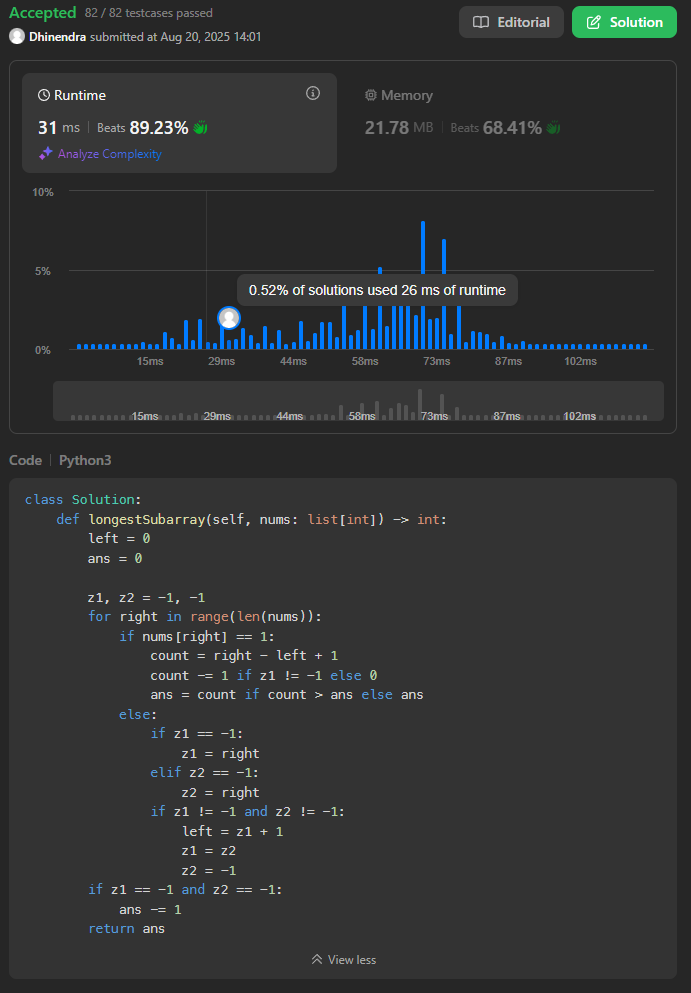

### Community References:
